In [17]:
#Generation of the dataset and construction of the K-mean algorithm


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math
import random
from sklearn.datasets import make_blobs

np.random.seed(0)

X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, random_state=42)

def k_mean_clustering(k,n_iterations):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    for n in range(n_iterations):
        clusters=[[] for i in range(k)]
        for i in X:
            distance=[]
            for j in centroids:
                euclidian=math.sqrt((j[0]-i[0])**2+(j[1]-i[1])**2)
                distance.append(euclidian)
            smallest=np.argmin(distance)
            clusters[smallest].append(i)
        for t in range(len(clusters)):
            clusters[t]=np.array(clusters[t])
        for l in range(k):
            centroids[l]=np.mean(clusters[l], axis=0)
                
    return clusters, centroids
            
def prediction(new_point,centro,clust):
    clusters=clust
    centroids=centro
    distance=[]
    for j in centroids:
        euclidian=math.sqrt((j[0]-new_point[0])**2+(j[1]-new_point[1])**2)
        distance.append(euclidian)
    smallest=np.argmin(distance)
    return smallest



centroids of the culsters are: [[-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]
 [-2.66780392  8.93576069]]
the cluster of x=[24, 56] is 2
distortion is: 1.7191098459057725


C:\Users\sh032\AppData\Local\Temp\ipykernel_10776\2627138524.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])


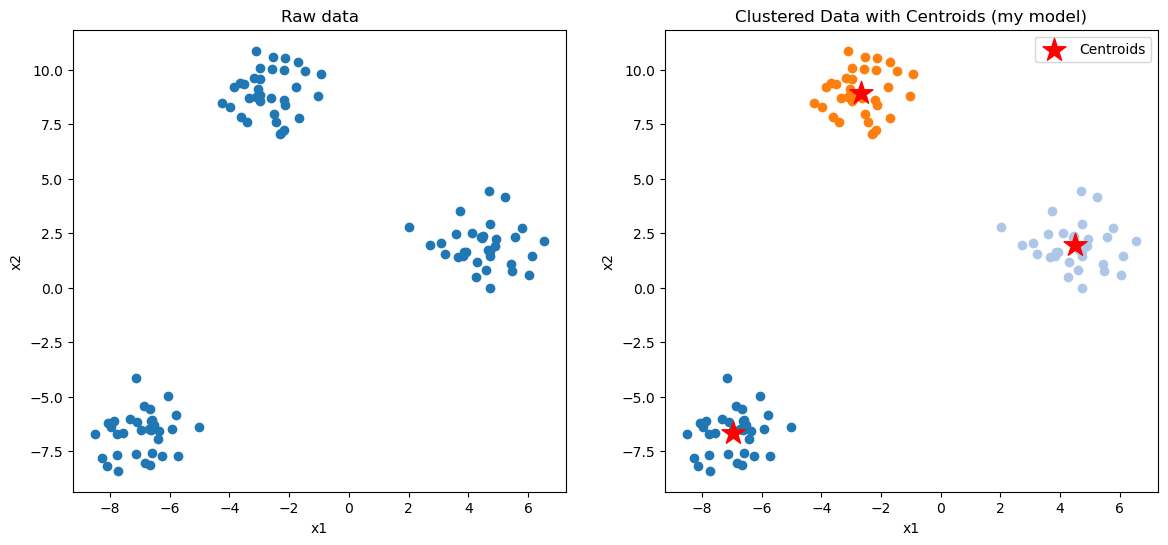

In [18]:
#Results of the constructed model with k=3


k=3
np.random.seed(0)

clusters,centroids=k_mean_clustering(k,1000)           
print(f"centroids of the culsters are: {centroids}") 

new_point=[24,56]
final_prediction=prediction(new_point,centroids,clusters)
print(f"the cluster of x={new_point} is {final_prediction}")

cost=[]
for i in range(k):
      cost_cluster=np.sum((clusters[i]-centroids[i])**2)
      cost.append(cost_cluster)
    
distortion=np.sum(cost)/X.shape[0]
print(f"distortion is: {distortion}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

cmap = plt.get_cmap('tab20')
colors = [cmap(j) for j in range(k)]

for j in range(k):
    ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])
    
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Clustered Data with Centroids (my model)")
ax2.legend()

C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids are:[[-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]
 [ 4.49951001  1.93892013]]
distortion is:1.7191098459057725


Text(0.5, 1.0, 'Clustered Data with Centroids (sklearn)')

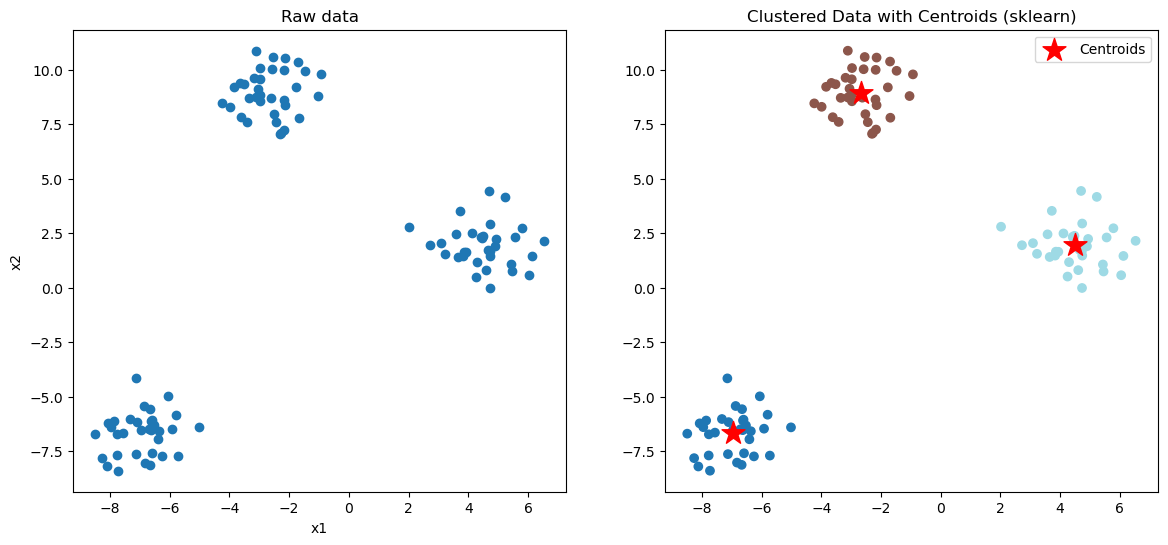

In [19]:
#Results of the Sklearn model with k=3

from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
centroids_ = kmeans.cluster_centers_
inertia = kmeans.inertia_
distortion  = inertia/X.shape[0]

print(f"centroids are:{centroids_}")
print(f"distortion is:{distortion}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab20')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
ax2.legend()
plt.title('Clustered Data with Centroids (sklearn)')

centroids of the culsters are: [[ 4.49951001  1.93892013]
 [-2.72550354  8.12321323]
 [-2.60289185  9.84987659]
 [-7.53386167 -7.33385427]
 [-6.46658291 -6.12818538]]
the cluster of x=[24, 56] is 2
distortion is: 1.253165389913943


C:\Users\sh032\AppData\Local\Temp\ipykernel_10776\702682847.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])


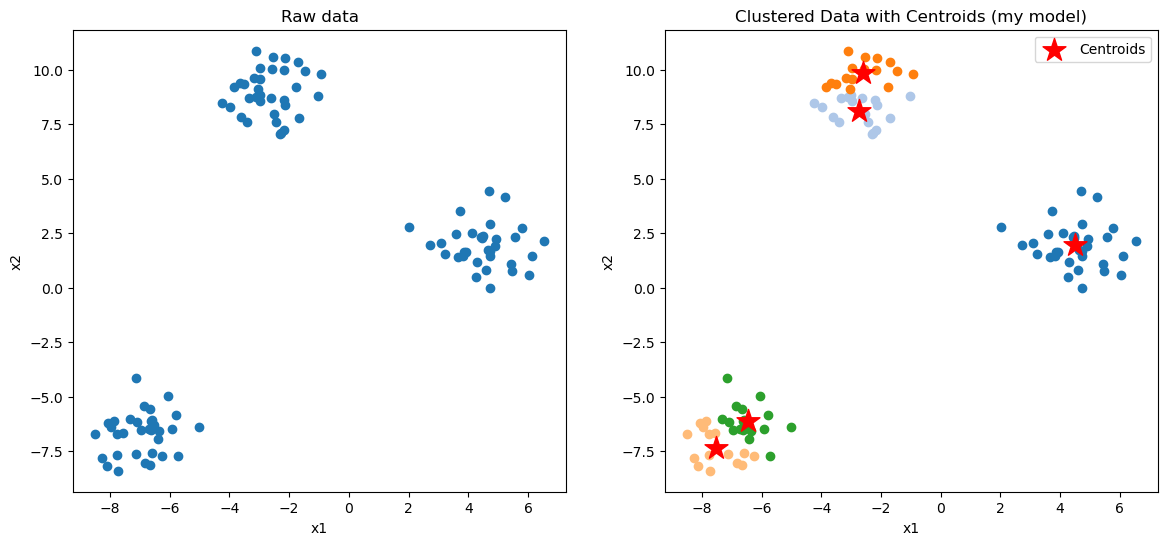

In [20]:
#Results of the constructed model with k=5


k=5
np.random.seed(0)

clusters,centroids=k_mean_clustering(k,1000)           
print(f"centroids of the culsters are: {centroids}") 

new_point=[24,56]
final_prediction=prediction(new_point,centroids,clusters)
print(f"the cluster of x={new_point} is {final_prediction}")

cost=[]
for i in range(k):
      cost_cluster=np.sum((clusters[i]-centroids[i])**2)
      cost.append(cost_cluster)
    
distortion=np.sum(cost)/X.shape[0]
print(f"distortion is: {distortion}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

cmap = plt.get_cmap('tab20')
colors = [cmap(j) for j in range(k)]

for j in range(k):
    ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])
    
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Clustered Data with Centroids (my model)")
ax2.legend()

C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids are:[[-2.72550354  8.12321323]
 [-7.23000553 -7.78364976]
 [ 4.49951001  1.93892013]
 [-6.81256166 -6.12250016]
 [-2.60289185  9.84987659]]
distortion is:1.2501607997642588


Text(0.5, 1.0, 'Clustered Data with Centroids (sklearn)')

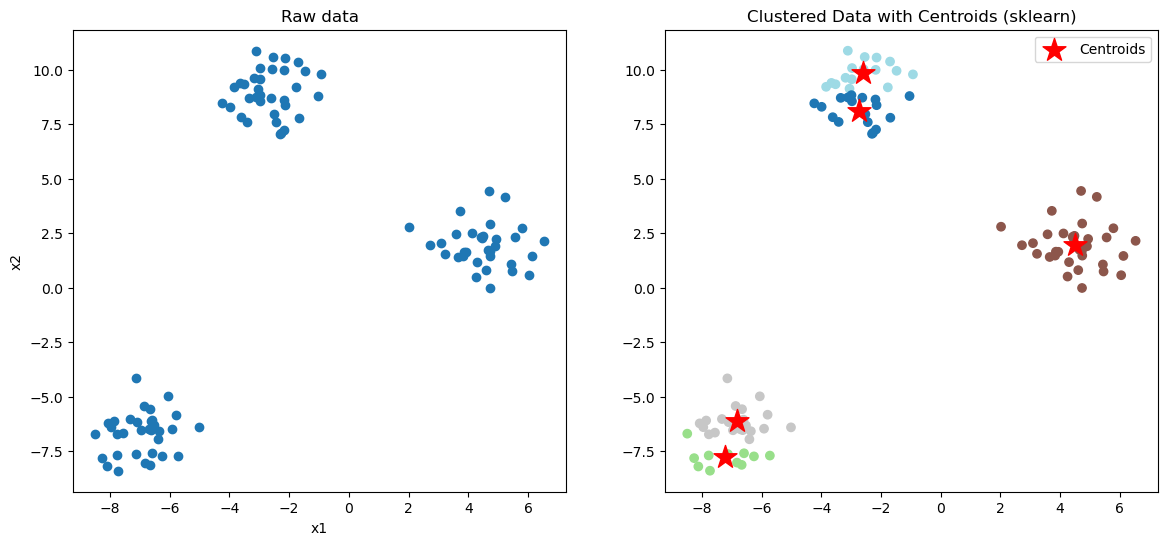

In [21]:
#Results of the Sklearn model with k=5


from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
centroids_ = kmeans.cluster_centers_
inertia = kmeans.inertia_
distortion  = inertia/X.shape[0]

print(f"centroids are:{centroids_}")
print(f"distortion is:{distortion}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab20')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
ax2.legend()
plt.title('Clustered Data with Centroids (sklearn)')

centroids of the culsters are: [[ 4.21590645  1.58564637]
 [-1.38382692  9.6143955 ]
 [-2.71218748 10.1574605 ]
 [-7.95554432 -7.08933118]
 [-6.51141471 -7.68117609]
 [ 5.25578614  2.88098348]
 [-6.50494429 -6.17931067]
 [-2.34822918  7.70519735]
 [-6.60092553 -4.57162852]
 [-3.41288635  8.76145215]]
the cluster of x=[24, 56] is 1
distortion is: 0.7420848862406563


C:\Users\sh032\AppData\Local\Temp\ipykernel_10776\155462833.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])


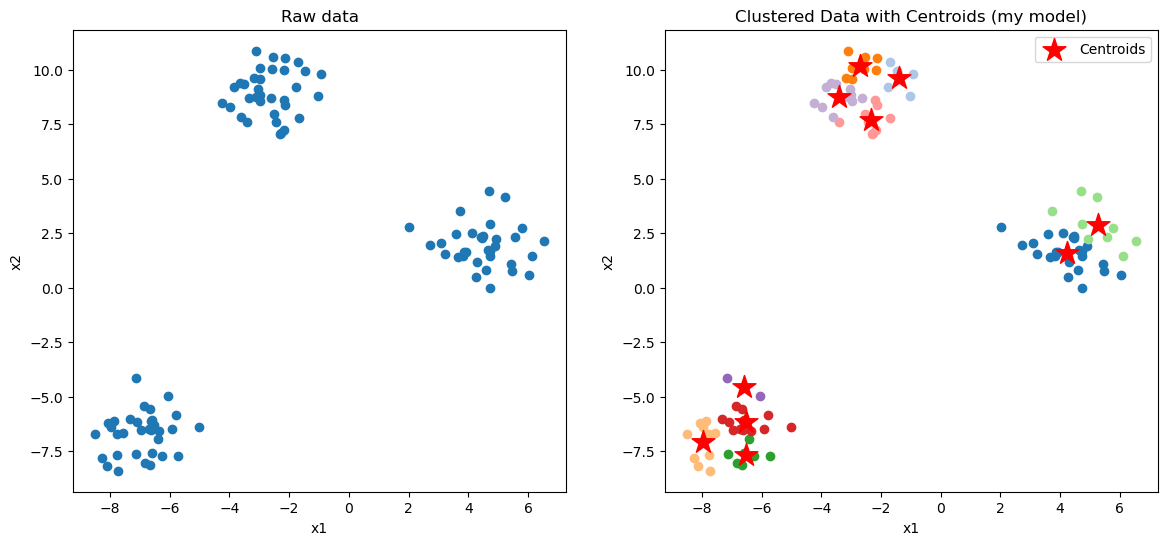

In [22]:
#Results of the constructed model with k=10


k=10
np.random.seed(0)

clusters,centroids=k_mean_clustering(k,1000)           
print(f"centroids of the culsters are: {centroids}") 

new_point=[24,56]
final_prediction=prediction(new_point,centroids,clusters)
print(f"the cluster of x={new_point} is {final_prediction}")

cost=[]
for i in range(k):
      cost_cluster=np.sum((clusters[i]-centroids[i])**2)
      cost.append(cost_cluster)
    
distortion=np.sum(cost)/X.shape[0]
print(f"distortion is: {distortion}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

cmap = plt.get_cmap('tab20')
colors = [cmap(j) for j in range(k)]

for j in range(k):
    ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])
    
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Clustered Data with Centroids (my model)")
ax2.legend()

C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids are:[[-7.95554432 -7.08933118]
 [ 4.59606399  3.76623897]
 [-3.36910997  8.79481445]
 [-6.51694195 -5.9783504 ]
 [ 4.97267452  0.69257797]
 [-2.08448776  7.83703373]
 [ 3.40178376  1.94440845]
 [-2.1408294  10.13603431]
 [ 5.10608458  2.05227316]
 [-6.51141471 -7.68117609]]
distortion is:0.5964393375864058


Text(0.5, 1.0, 'Clustered Data with Centroids (sklearn)')

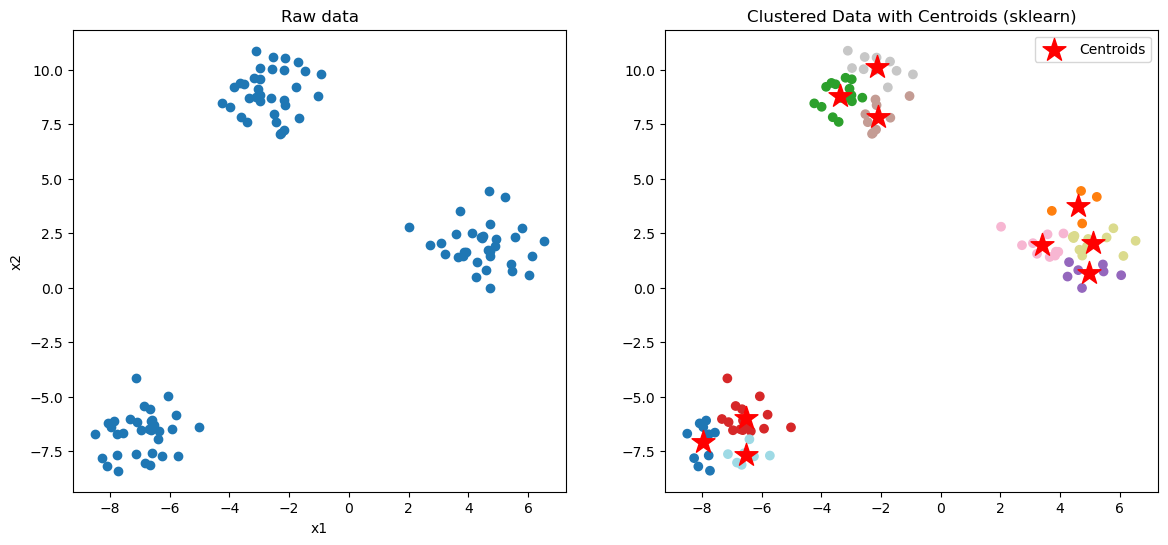

In [23]:
#Results of the Sklearn model with k=10


from sklearn.cluster import KMeans
k=10
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
centroids_ = kmeans.cluster_centers_
inertia = kmeans.inertia_
distortion  = inertia/X.shape[0]

print(f"centroids are:{centroids_}")
print(f"distortion is:{distortion}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab20')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
ax2.legend()
plt.title('Clustered Data with Centroids (sklearn)')

In [24]:
#Initialization of centroids with a random state of 1


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math
import random
from sklearn.datasets import make_blobs

np.random.seed(1)

X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, random_state=42)

def k_mean_clustering(k,n_iterations):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    for n in range(n_iterations):
        clusters=[[] for i in range(k)]
        for i in X:
            distance=[]
            for j in centroids:
                euclidian=math.sqrt((j[0]-i[0])**2+(j[1]-i[1])**2)
                distance.append(euclidian)
            smallest=np.argmin(distance)
            clusters[smallest].append(i)
        for t in range(len(clusters)):
            clusters[t]=np.array(clusters[t])
        for l in range(k):
            centroids[l]=np.mean(clusters[l], axis=0)
                
    return clusters, centroids
            
def prediction(new_point,centro,clust):
    clusters=clust
    centroids=centro
    distance=[]
    for j in centroids:
        euclidian=math.sqrt((j[0]-new_point[0])**2+(j[1]-new_point[1])**2)
        distance.append(euclidian)
    smallest=np.argmin(distance)
    return smallest



centroids of the culsters are: [[-2.42827717  9.82346174]
 [-2.88071658  8.14669309]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]
the cluster of x=[24, 56] is 0
distortion is: 1.463615344623478


C:\Users\sh032\AppData\Local\Temp\ipykernel_10776\3421633334.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])


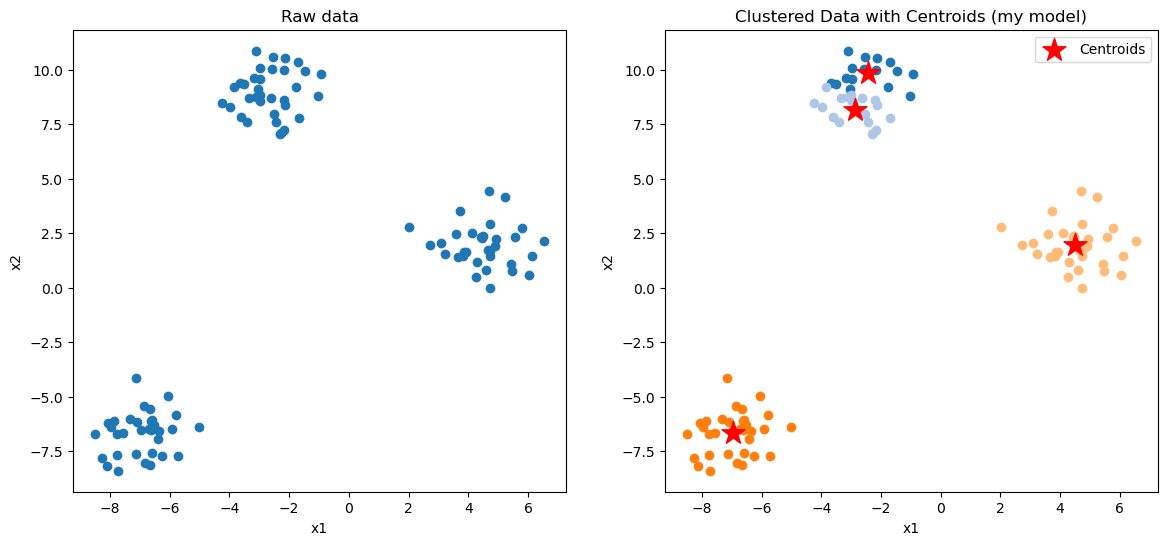

In [25]:
#Results of the constructed model with an initialization of centroids with a random state of 1


k=4
np.random.seed(1)

clusters,centroids=k_mean_clustering(k,1000)           
print(f"centroids of the culsters are: {centroids}") 

new_point=[24,56]
final_prediction=prediction(new_point,centroids,clusters)
print(f"the cluster of x={new_point} is {final_prediction}")

cost=[]
for i in range(k):
      cost_cluster=np.sum((clusters[i]-centroids[i])**2)
      cost.append(cost_cluster)
    
distortion=np.sum(cost)/X.shape[0]
print(f"distortion is: {distortion}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

cmap = plt.get_cmap('tab20')
colors = [cmap(j) for j in range(k)]

for j in range(k):
    ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])
    
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Clustered Data with Centroids (my model)")
ax2.legend()

C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids are:[[-2.95660471  8.30877152]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]
 [-2.20127958  9.94858935]]
distortion is:1.4573896794548231


Text(0.5, 1.0, 'Clustered Data with Centroids (sklearn)')

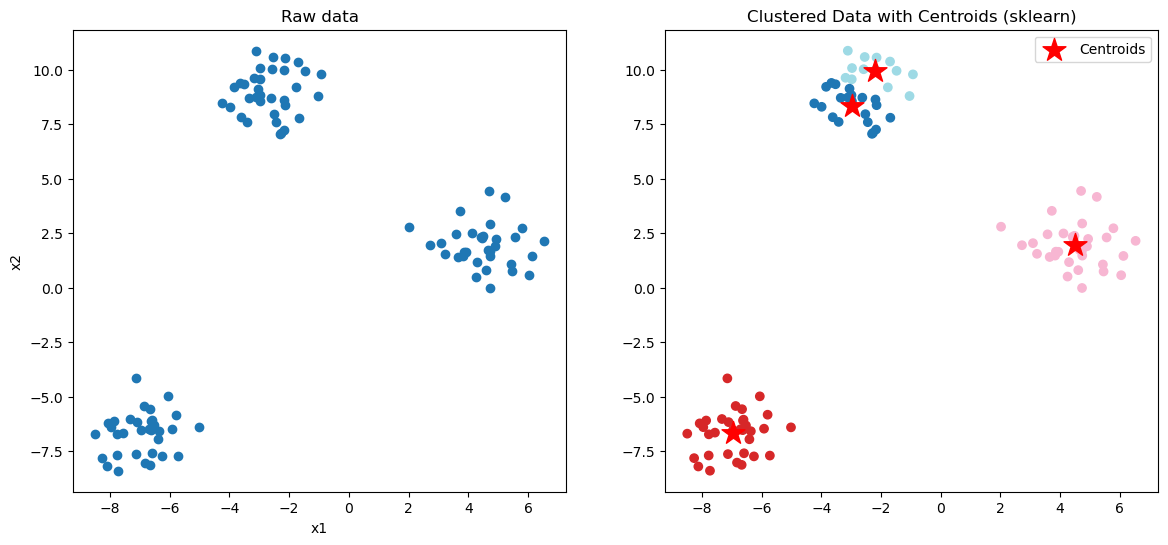

In [26]:
#Results of the Sklearn model with an initialization of centroids with a random state of 1


from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)
centroids_ = kmeans.cluster_centers_
inertia = kmeans.inertia_
distortion  = inertia/X.shape[0]

print(f"centroids are:{centroids_}")
print(f"distortion is:{distortion}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab20')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
ax2.legend()
plt.title('Clustered Data with Centroids (sklearn)')

In [27]:
#Initialization of centroids with a random state of 56



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math
import random
from sklearn.datasets import make_blobs

np.random.seed(56)

X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, random_state=42)

def k_mean_clustering(k,n_iterations):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    for n in range(n_iterations):
        clusters=[[] for i in range(k)]
        for i in X:
            distance=[]
            for j in centroids:
                euclidian=math.sqrt((j[0]-i[0])**2+(j[1]-i[1])**2)
                distance.append(euclidian)
            smallest=np.argmin(distance)
            clusters[smallest].append(i)
        for t in range(len(clusters)):
            clusters[t]=np.array(clusters[t])
        for l in range(k):
            centroids[l]=np.mean(clusters[l], axis=0)
                
    return clusters, centroids
            
def prediction(new_point,centro,clust):
    clusters=clust
    centroids=centro
    distance=[]
    for j in centroids:
        euclidian=math.sqrt((j[0]-new_point[0])**2+(j[1]-new_point[1])**2)
        distance.append(euclidian)
    smallest=np.argmin(distance)
    return smallest



centroids of the culsters are: [[-2.95660471  8.30877152]
 [-6.95170962 -6.67621669]
 [-2.20127958  9.94858935]
 [ 4.49951001  1.93892013]]
the cluster of x=[24, 56] is 2
distortion is: 1.4573896794548231


C:\Users\sh032\AppData\Local\Temp\ipykernel_10776\3913524123.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])


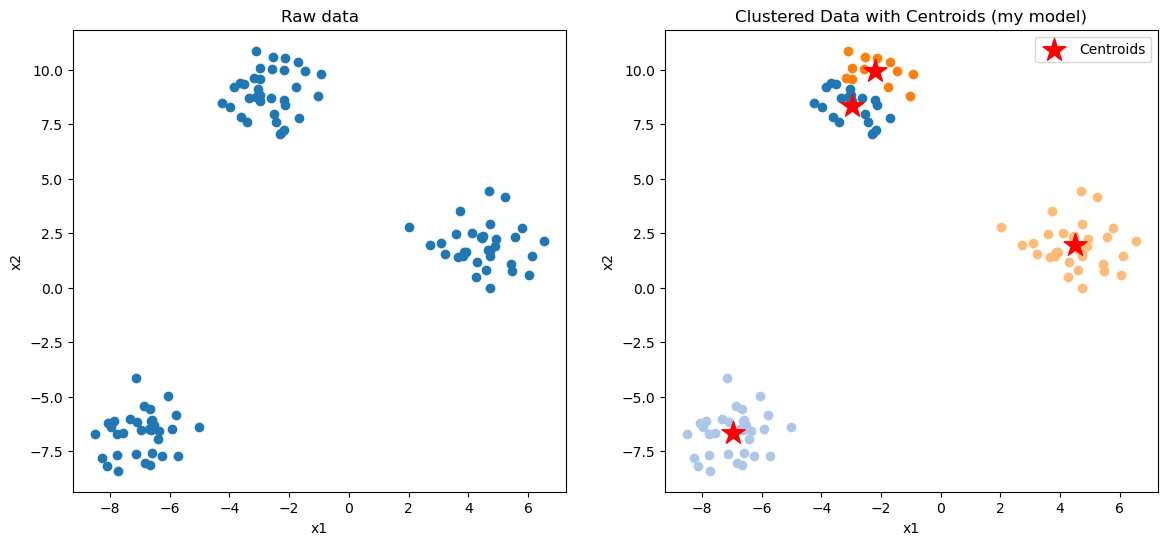

In [28]:
#Results of the constructed model with an initialization of centroids with a random state of 56


k=4
np.random.seed(56)

clusters,centroids=k_mean_clustering(k,1000)           
print(f"centroids of the culsters are: {centroids}") 

new_point=[24,56]
final_prediction=prediction(new_point,centroids,clusters)
print(f"the cluster of x={new_point} is {final_prediction}")

cost=[]
for i in range(k):
      cost_cluster=np.sum((clusters[i]-centroids[i])**2)
      cost.append(cost_cluster)
    
distortion=np.sum(cost)/X.shape[0]
print(f"distortion is: {distortion}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

cmap = plt.get_cmap('tab20')
colors = [cmap(j) for j in range(k)]

for j in range(k):
    ax2.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j])
    
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Clustered Data with Centroids (my model)")
ax2.legend()

C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids are:[[-2.20127958  9.94858935]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]
 [-2.95660471  8.30877152]]
distortion is:1.4573896794548231


Text(0.5, 1.0, 'Clustered Data with Centroids (sklearn)')

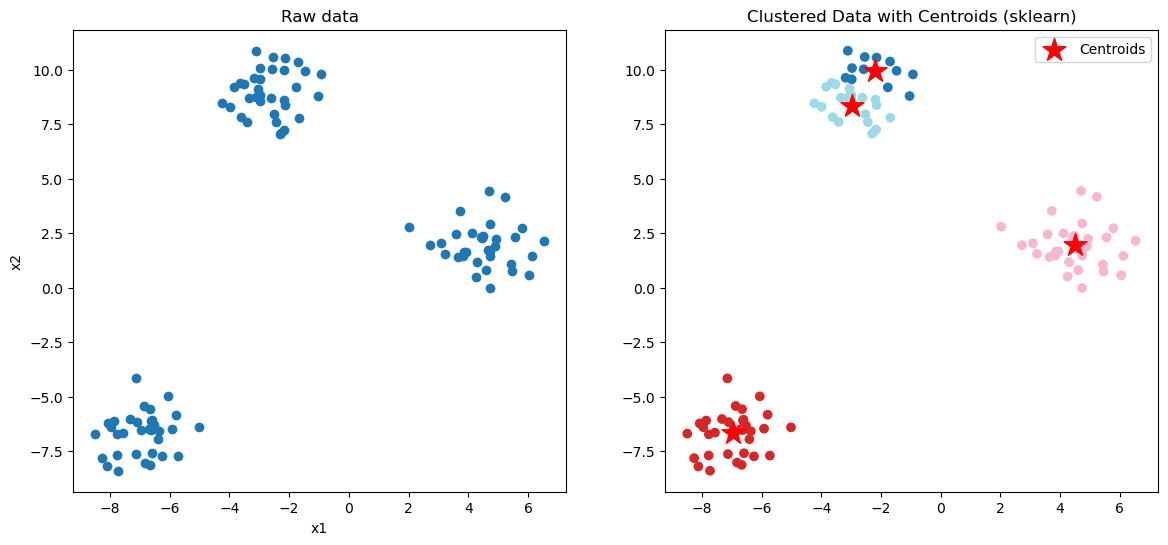

In [29]:
#Results of the Sklearn model with an initialization of centroids with random state of 56



from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, random_state=56)
kmeans.fit(X)
centroids_ = kmeans.cluster_centers_
inertia = kmeans.inertia_
distortion  = inertia/X.shape[0]

print(f"centroids are:{centroids_}")
print(f"distortion is:{distortion}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Raw data")

ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab20')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
ax2.legend()
plt.title('Clustered Data with Centroids (sklearn)')